In [1]:
# imports
# I was trying a lot of different things during this notebook therefore there might be the one or two libaries which
# arn´t needed anymore


import requests                 # How Python gets the webpages
from bs4 import BeautifulSoup   # Creates structured, searchable object
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter 

import datetime as dt
from datetime import date
from scipy import stats
#from pandas.core import datetools
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.tools as tls
import plotly.graph_objs as go
import warnings
import seaborn as sns


from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics 
from sklearn import preprocessing


import json
from time import sleep
from datetime import datetime

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix # confusion matrix
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import gc

## 1.Catboost
Catboost is especially effective when it comes to categorical data. Here in our case there is just nummeric data.
Nevertheless in some surveys the Catboost got better accurency values then its compeditors XG Boost or Light GBM.
Therefore we try the Catboost here in your Santander case.

In [8]:
from catboost import CatBoostRegressor, Pool

We are loading in the data of our feature selection. (Can be seen in Notebook Datacleaning + Feature Selection)

In [45]:
train = pd.read_csv('train_adj_complete_featureselection.csv', index_col= 'ID') # Source: Kaggle
test = pd.read_csv('test_adj_complete_featureselection.csv', index_col= 'ID') # Source: Kaggle

Checking the train data....

In [47]:
train.shape

(4459, 430)

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4459 entries, 000d6aaf2 to ffeb15d25
Columns: 430 entries, target to 3a13ed79a
dtypes: float64(375), int64(55)
memory usage: 14.7+ MB


### 1.1 First Try

So we have after the cleaning and feature engineering a dataframe with 430 remaining features and a Memory Usage of almost 15 MB. Lets split the data in train and validation df to be able to train the model with a huge amount of iterations and get the best score out of it.

In [6]:
X_train = train.drop(["target"], axis=1)
y_train = np.log1p(train["target"].values)

X_test = test
dev_X, val_X, dev_y, val_y = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

Lets jump in the model. Like XG Boost and other algorithms we first have to set the parameters. The Paramters in the first step are chosen out of experience and study of papers, and notebooks. After the first try we used will try to enhence the model.
Interations of 100 is quite low, but we first want to see how the model is wokring and didnt want to waste to much time for the first try. Additionally we can see the enhencement of every interation, so we will see if there is potential after the 100 iteration.

In [13]:
cb_model = CatBoostRegressor(iterations=100,
                             learning_rate=0.05,
                             depth=10,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 10,
                             od_wait=20)

Now we will fit the model on the trainings and validation sets. we want to be used the best model out of the training and with verbose we wanna see the result after every tenth iteration.

In [14]:
cb_model.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=10)

0:	learn: 13.9016183	test: 13.8895963	best: 13.8895963 (0)	total: 943ms	remaining: 1m 33s
10:	learn: 8.6748345	test: 8.7081666	best: 8.7081666 (10)	total: 10.1s	remaining: 1m 21s
20:	learn: 5.5241618	test: 5.5947979	best: 5.5947979 (20)	total: 19.5s	remaining: 1m 13s
30:	learn: 3.6959400	test: 3.7982659	best: 3.7982659 (30)	total: 28.9s	remaining: 1m 4s
40:	learn: 2.6802862	test: 2.8065316	best: 2.8065316 (40)	total: 38.4s	remaining: 55.3s
50:	learn: 2.1436021	test: 2.2811650	best: 2.2811650 (50)	total: 48.1s	remaining: 46.2s
60:	learn: 1.8643918	test: 2.0097421	best: 2.0097421 (60)	total: 57.6s	remaining: 36.9s
70:	learn: 1.7159046	test: 1.8632549	best: 1.8632549 (70)	total: 1m 7s	remaining: 27.5s
80:	learn: 1.6223944	test: 1.7784282	best: 1.7784282 (80)	total: 1m 17s	remaining: 18.1s
90:	learn: 1.5535226	test: 1.7213831	best: 1.7213831 (90)	total: 1m 27s	remaining: 8.61s
99:	learn: 1.5083399	test: 1.6845136	best: 1.6845136 (99)	total: 1m 35s	remaining: 0us

bestTest = 1.684513617
bes

it´s gonna be exiting, now we will predict the sample...

In [15]:
cat_prediction = np.expm1(cb_model.predict(X_test))

In [16]:
cat_prediction

array([1418090.52022196, 1269298.31763977, 1159999.38456845, ...,
       1338195.75414902, 1009316.82441957, 1348807.15496373])

### 1.2 Second Try
we have seen that there is some potential after the 100 iterations left. So we  increase our iterations to get a perfectly trained model. 

In [17]:
cb_model = CatBoostRegressor(iterations=300,
                             learning_rate=0.05, #same as XG boost
                             depth=10,
                             eval_metric='RMSE', #how to evaluate
                             random_seed = 42, #The random seed used for training.
                             bagging_temperature = 0.2, #The higher the value the more aggressive the bagging is.
                             od_type='Iter',
                             metric_period = 10,
                             od_wait=20) #The number of iterations to continue the training after the iteration with the optimal metric value.
# Usefule feature for bigger datasets: "used_ram_limit" - there you can set your limit of RAM usage

In [18]:
cb_model.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=10)

0:	learn: 13.9016183	test: 13.8895963	best: 13.8895963 (0)	total: 957ms	remaining: 4m 46s
10:	learn: 8.6748345	test: 8.7081666	best: 8.7081666 (10)	total: 10.3s	remaining: 4m 31s
20:	learn: 5.5241618	test: 5.5947979	best: 5.5947979 (20)	total: 19.9s	remaining: 4m 24s
30:	learn: 3.6959400	test: 3.7982659	best: 3.7982659 (30)	total: 29.5s	remaining: 4m 15s
40:	learn: 2.6802862	test: 2.8065316	best: 2.8065316 (40)	total: 39.1s	remaining: 4m 6s
50:	learn: 2.1436021	test: 2.2811650	best: 2.2811650 (50)	total: 49s	remaining: 3m 59s
60:	learn: 1.8643918	test: 2.0097421	best: 2.0097421 (60)	total: 58.6s	remaining: 3m 49s
70:	learn: 1.7159046	test: 1.8632549	best: 1.8632549 (70)	total: 1m 8s	remaining: 3m 41s
80:	learn: 1.6223944	test: 1.7784282	best: 1.7784282 (80)	total: 1m 18s	remaining: 3m 32s
90:	learn: 1.5535226	test: 1.7213831	best: 1.7213831 (90)	total: 1m 28s	remaining: 3m 23s
100:	learn: 1.5045544	test: 1.6803836	best: 1.6803836 (100)	total: 1m 38s	remaining: 3m 14s
110:	learn: 1.4611

In [19]:
cat_prediction2 = np.expm1(cb_model.predict(X_test))

In [20]:
cat_prediction2

array([1725528.52321911, 1712425.37105587, 1632924.81095485, ...,
       1720750.54396864,  458347.37886202, 1800478.58580105])

For the submission we have to bring the data in a specific format, so we apply some data ajustment.

In [35]:
sub = pd.read_csv('..\datasets/st1_sample_submission.csv') # Source: Kaggle
sub_4 = sub
sub_4['target'] = cat_prediction2
sub_4 = sub_4.set_index('ID')

In [36]:
sub_4.to_csv('submission_CAT1.csv')

For the first try not bad, but not as good as the score from Light GBM.

### 1.3 Third Try Catboost
Now we increase the iterations massivly due to the increase of leanring after 300 iterations the last time. Due to the experience with the XG Boost that sometimes less parameters are better and leanring rate decrease has a good impact an the accurancy (not to low in terms of overfitting) we decrease the parameter and the value for leanring rate in the next try.

In [37]:
cb_model = CatBoostRegressor(iterations=1500,
                             learning_rate=0.01,
                             depth=10,
                             eval_metric='RMSE',
                             #random_seed = 42,
                             #bagging_temperature = 0.2,
                             #od_type='Iter',
                             metric_period = 10,
                             od_wait=20)

In [38]:
cb_model.fit(dev_X, dev_y,
             eval_set=(val_X, val_y),
             use_best_model=True,
             verbose=10)

0:	learn: 14.4605460	test: 14.4499193	best: 14.4499193 (0)	total: 3.61s	remaining: 1h 30m 9s
10:	learn: 13.1439854	test: 13.1369928	best: 13.1369928 (10)	total: 41.5s	remaining: 1h 33m 38s
20:	learn: 11.9518322	test: 11.9489225	best: 11.9489225 (20)	total: 1m 24s	remaining: 1h 38m 44s
30:	learn: 10.8744722	test: 10.8746659	best: 10.8746659 (30)	total: 2m 10s	remaining: 1h 42m 54s
40:	learn: 9.8989566	test: 9.9025742	best: 9.9025742 (40)	total: 2m 57s	remaining: 1h 45m 16s
50:	learn: 9.0134583	test: 9.0201820	best: 9.0201820 (50)	total: 3m 45s	remaining: 1h 46m 56s
60:	learn: 8.2184795	test: 8.2278570	best: 8.2278570 (60)	total: 4m 37s	remaining: 1h 49m 1s
70:	learn: 7.4960307	test: 7.5076305	best: 7.5076305 (70)	total: 5m 32s	remaining: 1h 51m 31s
80:	learn: 6.8456138	test: 6.8615082	best: 6.8615082 (80)	total: 6m 26s	remaining: 1h 52m 57s
90:	learn: 6.2613330	test: 6.2805072	best: 6.2805072 (90)	total: 7m 27s	remaining: 1h 55m 30s
100:	learn: 5.7326788	test: 5.7554050	best: 5.7554050 

840:	learn: 1.5503001	test: 1.5808479	best: 1.5808479 (840)	total: 5h 6m 15s	remaining: 3h 59m 58s
850:	learn: 1.5499922	test: 1.5806341	best: 1.5806341 (850)	total: 5h 10m 12s	remaining: 3h 56m 34s
860:	learn: 1.5495702	test: 1.5803759	best: 1.5803759 (860)	total: 5h 14m 8s	remaining: 3h 53m 8s
870:	learn: 1.5492178	test: 1.5800868	best: 1.5800868 (870)	total: 5h 18m 2s	remaining: 3h 49m 40s
880:	learn: 1.5486857	test: 1.5796718	best: 1.5796718 (880)	total: 5h 22m 20s	remaining: 3h 46m 29s
890:	learn: 1.5484565	test: 1.5794144	best: 1.5794144 (890)	total: 5h 26m 39s	remaining: 3h 43m 16s
900:	learn: 1.5479986	test: 1.5790480	best: 1.5790480 (900)	total: 5h 30m 59s	remaining: 3h 40m 3s
910:	learn: 1.5475803	test: 1.5788154	best: 1.5788154 (910)	total: 5h 35m 18s	remaining: 3h 36m 47s
920:	learn: 1.5473539	test: 1.5786584	best: 1.5786584 (920)	total: 5h 39m 13s	remaining: 3h 33m 15s
930:	learn: 1.5469327	test: 1.5783141	best: 1.5783141 (930)	total: 5h 43m 13s	remaining: 3h 29m 46s
940:	

Lets predict again....

In [39]:
cat_prediction3 = np.expm1(cb_model.predict(X_test))

In [40]:
sub = pd.read_csv('..\datasets/st1_sample_submission.csv') # Source: Kaggle

In [41]:
sub_6 = sub
sub_6['target'] = cat_prediction3
sub_6 = sub_6.set_index('ID')
sub_6

,target
ID,
000137c73,1.316386e+06
00021489f,1.134117e+06
0004d7953,2.140576e+06
00056a333,2.676342e+06
00056d8eb,1.134117e+06
...,...
fff73b677,1.246673e+06
fff7b5923,2.762979e+06
fff7c698f,1.215210e+06


In [43]:
sub_6.to_csv('submission_CAT2.csv')

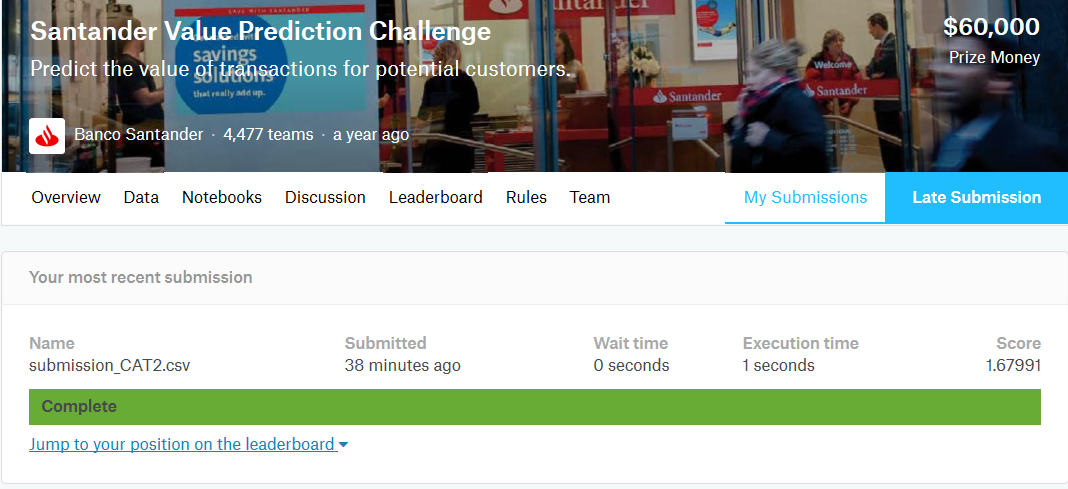

Unfortunately the score is not amazing,and even worse then the try before. Light GBM has whith a big gap till now the best score.

### XG-Boost
In the last assignments XG Boost was always the best Boosting algorithm, lets check if it is still the best.
- Important to mention, we tried XG Boost with nearly the wohle dataset it the first step, but it took us a whole night and after the night the laptop broke down. So we had to reduce the memory usage and the features a lot
- We think its the highly sophisticated algorithm which tries to get a lot of information out of unnecessary features, and columns especially when it comes to zero values. Therefore we but massive efford to reduce the dataset with a minimum of reducing informative data. 
- Due to the fact that we had bad experience with XG Boost and runtime we use simple parameters to have no too sophisticated model. (leanring rate 0.2 is quite traditional and not pretty good, as well as 50 estimators and max depth of 5) But we want to reduce runtime in the first step. So lets see....

In [25]:
xgb1 = XGBClassifier(
 learning_rate =0.2,
 n_estimators=50,
 max_depth=5, # Typical values: 3-10 also for over and underfitting .... max of trees ... high deduced overfitting
 #min_child_weight=1, #over or underfitting / to low = overfitting, to high underfitting
 gamma=0,
 #subsample=0.8, # Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting. Typical values: 0.5-1
 #colsample_bytree=0.8,
 #objective= 'binary:logistic',
 #nthread=4,
 #scale_pos_weight=1,
 #tree_method='exact'
 )  #seed= 27


xgb1.fit(X_train, y_train, verbose =1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [26]:
XG_prediction = np.expm1(xgb1.predict(X_test))

In [28]:
sub = pd.read_csv('..\datasets/st1_sample_submission.csv') # Source: Kaggle

In [29]:
sub_3 = sub
sub_3['target'] = XG_prediction
sub_3 = sub_3.set_index('ID')
sub_3

,target
ID,
000137c73,10000000.0
00021489f,2000000.0
0004d7953,2000000.0
00056a333,20000000.0
00056d8eb,2000000.0
...,...
fff73b677,1000000.0
fff7b5923,20000000.0
fff7c698f,1000000.0


In [42]:
sub_3.to_csv('submission_XG.csv')

A very bad score in comparison to the other Boosting results. Reason is probably the low number of paramteters we are using and the high leanringrate and the model should be underfitted. The problem is, that the XG Boost was running 5 hours and in comparison to the Light GBM so bad, that we try it ones with better paramters on an other laptop but not putting to much efford in it. 
